In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
%matplotlib inline
plt.style.use('fivethirtyeight')

In [2]:
# Load data
print('Load data')
TrainData= pd.read_csv('train_clean.csv')
TrainData.head()

Load data


,1stFlrSF,2ndFlrSF,Alley,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinType1,BsmtFullBath,BsmtQual,BsmtUnfSF,...,MSZoning_C (all),MSZoning_RL,Neighborhood_ClearCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_StoneBr,SaleCondition_Abnorml,SaleCondition_Family,SaleType_New,SalePrice
0,11.692623,11.686189,0.730463,1.820334,1.540963,11.170327,1.194318,0.730463,1.194318,7.483296,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.247699
1,12.792276,0.000000,0.730463,1.820334,0.730463,12.062832,0.000000,0.000000,1.194318,8.897844,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.109016
2,11.892039,11.724598,0.730463,1.820334,1.194318,10.200343,1.194318,0.730463,1.194318,9.917060,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.317171
3,12.013683,11.354094,0.730463,0.730463,1.540963,8.274266,0.000000,0.730463,1.820334,10.468500,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,11.849405
4,12.510588,12.271365,0.730463,1.820334,0.000000,10.971129,1.194318,0.730463,1.194318,10.221051,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.429220


In [3]:
TestData= pd.read_csv('test_clean.csv')
TestData.head()

,1stFlrSF,2ndFlrSF,Alley,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinType1,BsmtFullBath,BsmtQual,BsmtUnfSF,...,MSZoning_C (all),MSZoning_RL,Neighborhood_ClearCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_StoneBr,SaleCondition_Abnorml,SaleCondition_Family,SaleType_New,Id
0,11.818680,0.000000,0.730463,1.820334,1.540963,10.105326,2.055642,0.0,1.820334,8.780689,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1461
1,12.943735,0.000000,0.730463,1.820334,1.540963,11.901094,0.000000,0.0,1.820334,9.752379,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1462
2,11.916131,11.151348,0.730463,1.820334,1.540963,11.476685,1.194318,0.0,1.194318,7.293500,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1463
3,11.910125,11.062536,0.730463,1.820334,1.540963,10.749651,1.194318,0.0,1.820334,9.207511,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1464
4,12.833625,0.000000,0.730463,1.820334,1.540963,8.720170,0.000000,0.0,1.194318,12.172900,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1465


# Prediction Results

In [4]:
X_train = TrainData.drop('SalePrice', axis=1).values
X_test = TestData.drop('Id', axis=1).values
y_train = TrainData['SalePrice'].values

inputs = X_train, y_train, X_test


NFOLDS = 5 # set folds for out-of-fold prediction

## b. Candidate Models

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVR, LinearSVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import AdaBoostRegressor

from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
from sklearn.metrics import mean_squared_error as mse

def candidate_models():
    return [LinearRegression(), 
            SVR(),
            LinearSVR(),
            KNeighborsRegressor(),
            DecisionTreeRegressor(),
            MLPRegressor(),
            Lasso(),
            ElasticNet()]

In [6]:
def name(model):
    r = model.__class__.__name__
    if 'base_estimator' in dir(model):
        r += '({})'.format(name(model.base_estimator))
    return r


def best_model(model2predict):
    score_df = series_best_first(model2predict)
    print(score_df)
    return score_df.keys()[0]


def series_best_first(model2predict):
    model2score = {k: v[1] for k, v in model2predict.items()}
    return pd.Series(model2score).sort_values(ascending=True)


def write_submission(predict, submission_csv):
    submission = pd.DataFrame({
        "Id": TestData["Id"],
        "SalePrice": predict
    })
    submission.to_csv(submission_csv, index=False)
    return pd.read_csv(submission_csv).tail(10)

def predict_and_score(model, inputs):
    X, y, X_test = inputs
    model.fit(X, y)
    pred_train = model.predict(X)
    pred_test = model.predict(X_test)
    return pred_test, mse(pred_train, y)

In [30]:
np.random.seed(8848)
table = {name(m): -cross_val_score(m, X_train, y_train, cv=NFOLDS, scoring='neg_mean_squared_error').mean() 
                     for m in candidate_models()}

In [31]:
pd.Series(table).sort_values(ascending=True)

LinearRegression         0.016437
LinearSVR                0.028505
SVR                      0.034300
MLPRegressor             0.043030
DecisionTreeRegressor    0.046471
KNeighborsRegressor      0.051909
ElasticNet               0.150595
Lasso                    0.159635
dtype: float64

### Tune parameter using cross validation

In [9]:
best_candidates = []

### 1. DecisionTreeRegressor

Text(17.06,0.5,'max_depth')

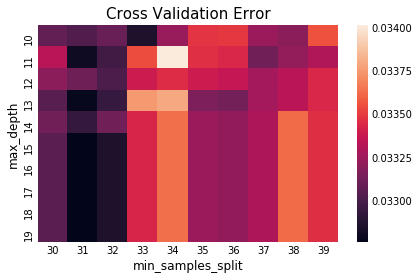

In [10]:
max_depth = range(10, 20, 1)
min_samples_split = range(30, 40, 1)
cv_score = np.zeros([len(max_depth), len(min_samples_split)])
for di, d in enumerate(max_depth):
    for si, s in enumerate(min_samples_split):
        dtr = DecisionTreeRegressor(max_depth=d, min_samples_split=s, random_state=8848)
        scores = cross_val_score(dtr, X_train, y_train, cv=NFOLDS, scoring='neg_mean_squared_error')
        cv_score[di, si] = -scores.mean()

plt.title('Cross Validation Error', fontsize=15)
sns.heatmap(cv_score, xticklabels=min_samples_split, yticklabels=max_depth)
plt.xlabel('min_samples_split')
plt.ylabel('max_depth')

In [11]:
best_d, best_s = np.unravel_index(cv_score.argmin(), cv_score.shape)
print('The best parameters tuned by cross validation:')
print('  {name}: {value}'.format(name='max_depth', value=max_depth[best_d]))
print('  {name}: {value}'.format(name='min_samples_split', value=min_samples_split[best_s]))
print('The best cross validation error is {:.4f}'.format(cv_score.min()))

The best parameters tuned by cross validation:
  max_depth: 15
  min_samples_split: 31
The best cross validation error is 0.0328


In [12]:
best_candidates.append(
    DecisionTreeRegressor(max_depth=max_depth[best_d], min_samples_split=min_samples_split[best_s])
)

### 2. LinearRegression
Since there are no parameters to train in linear regression, we simply use it as the best candidate.

In [13]:
best_candidates.append(LinearRegression())

### 3. ElasticNet

Text(17.06,0.5,'alpha')

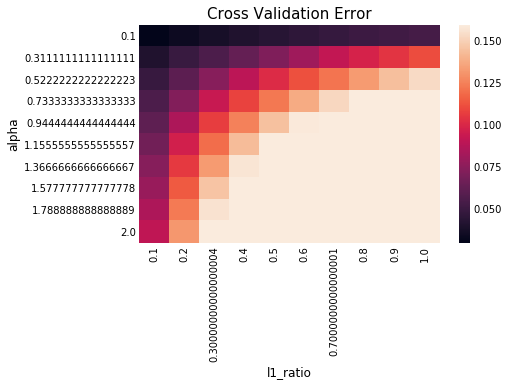

In [14]:
import warnings
from sklearn.exceptions import ConvergenceWarning
alpha = np.linspace(0.1, 2, 10)
l1_ratio = np.linspace(0.1, 1, 10)
cv_score = np.zeros([len(alpha), len(l1_ratio)])
for di, d in enumerate(alpha):
    for si, s in enumerate(l1_ratio):
        with warnings.catch_warnings():
            warnings.filterwarnings("ignore",category=ConvergenceWarning)
            dtr = ElasticNet(alpha=d, l1_ratio=s, random_state=8848, max_iter=1000)
            scores = cross_val_score(dtr, X_train, y_train, cv=NFOLDS, scoring='neg_mean_squared_error')
        cv_score[di, si] = -scores.mean()

plt.title('Cross Validation Error', fontsize=15)
sns.heatmap(cv_score, xticklabels=l1_ratio, yticklabels=alpha)
plt.xlabel('l1_ratio')
plt.ylabel('alpha')

In [15]:
best_d, best_s = np.unravel_index(cv_score.argmin(), cv_score.shape)
print('The best parameters tuned by cross validation:')
print('  {name}: {value}'.format(name='alpha', value=alpha[best_d]))
print('  {name}: {value}'.format(name='l1_ratio', value=l1_ratio[best_s]))
print('The best cross validation error is {:.4f}'.format(cv_score.min()))

The best parameters tuned by cross validation:
  alpha: 0.1
  l1_ratio: 0.1
The best cross validation error is 0.0301


In [16]:
best_candidates.append(
    ElasticNet(alpha=alpha[best_d], l1_ratio=l1_ratio[best_s])
)

### 4. Lasso

Text(0.5,0,'alpha')

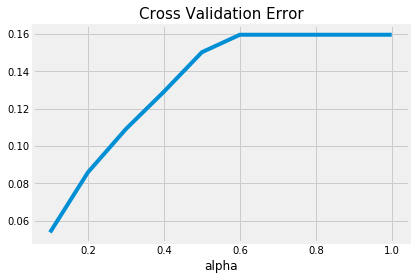

In [17]:
alpha = np.linspace(0.1, 1, 10)
cv_score = np.zeros([len(alpha)])
for di, d in enumerate(alpha):
    with warnings.catch_warnings():
        warnings.filterwarnings("ignore",category=ConvergenceWarning)
        dtr = Lasso(alpha=d, random_state=8848, max_iter=1000)
        scores = cross_val_score(dtr, X_train, y_train, cv=NFOLDS, scoring='neg_mean_squared_error')
    cv_score[di] = -scores.mean()

plt.title('Cross Validation Error', fontsize=15)
plt.plot(alpha, cv_score)
plt.xlabel('alpha')

In [18]:
best_d = cv_score.argmin()
print('The best parameters tuned by cross validation:')
print('  {name}: {value}'.format(name='alpha', value=alpha[best_d]))
print('The best cross validation error is {:.4f}'.format(cv_score.min()))

The best parameters tuned by cross validation:
  alpha: 0.1
The best cross validation error is 0.0536


In [19]:
best_candidates.append(
    Lasso(alpha=alpha[best_d])
)

### 5. LinearSVR

Text(0.5,0,'C')

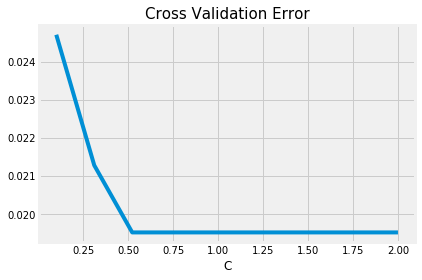

In [20]:
C = np.linspace(0.1, 2, 10)
cv_score = np.zeros([len(C)])
for di, d in enumerate(C):
    with warnings.catch_warnings():
        warnings.filterwarnings("ignore",category=ConvergenceWarning)
        dtr = LinearSVR(C=d, random_state=8848, max_iter=1000)
        scores = cross_val_score(dtr, X_train, y_train, cv=NFOLDS, scoring='neg_mean_squared_error')
    cv_score[di] = -scores.mean()

plt.title('Cross Validation Error', fontsize=15)
plt.plot(C, cv_score)
plt.xlabel('C')

In [21]:
best_d = cv_score.argmin()
if cv_score.min() == cv_score.max():
    best_c = 1
else:
    best_c = C[best_d]
print('The best parameters tuned by cross validation:')
print('  {name}: {value}'.format(name='C', value=best_c))
print('The best cross validation error is {:.4f}'.format(cv_score.min()))

The best parameters tuned by cross validation:
  C: 0.5222222222222223
The best cross validation error is 0.0195


In [22]:
best_candidates.append(
    LinearSVR(C=best_c)
)

### Summary

In [32]:
np.random.seed(8848)
table = {name(m): -cross_val_score(m, X_train, y_train, cv=NFOLDS, scoring='neg_mean_squared_error').mean() 
                     for m in best_candidates}
pd.Series(table).sort_values(ascending=True)

LinearRegression         0.016437
LinearSVR                0.026852
ElasticNet               0.030114
DecisionTreeRegressor    0.033124
Lasso                    0.053610
dtype: float64

## c. Ensemble methods

In [33]:
def ensemble_methods():
    methods = [RandomForestRegressor(), GradientBoostingRegressor()]
    for m in best_candidates:
        methods.append(BaggingRegressor(base_estimator=m))
    for m in best_candidates:
        methods.append(AdaBoostRegressor(base_estimator=m))
    return methods

In [34]:
[name(m) for m in ensemble_methods()]

['RandomForestRegressor(DecisionTreeRegressor)',
 'GradientBoostingRegressor',
 'BaggingRegressor(DecisionTreeRegressor)',
 'BaggingRegressor(LinearRegression)',
 'BaggingRegressor(ElasticNet)',
 'BaggingRegressor(Lasso)',
 'BaggingRegressor(LinearSVR)',
 'AdaBoostRegressor(DecisionTreeRegressor)',
 'AdaBoostRegressor(LinearRegression)',
 'AdaBoostRegressor(ElasticNet)',
 'AdaBoostRegressor(Lasso)',
 'AdaBoostRegressor(LinearSVR)']

In [35]:
np.random.seed(8848)
with warnings.catch_warnings():
    warnings.filterwarnings("ignore",category=ConvergenceWarning)
    table = {name(m): -cross_val_score(m, X_train, y_train, cv=NFOLDS, scoring='neg_mean_squared_error').mean() 
                     for m in ensemble_methods()}

In [36]:
pd.Series(table).sort_values(ascending=True)

GradientBoostingRegressor                       0.015500
BaggingRegressor(LinearRegression)              0.016478
BaggingRegressor(LinearSVR)                     0.018015
AdaBoostRegressor(DecisionTreeRegressor)        0.019584
AdaBoostRegressor(LinearSVR)                    0.021904
RandomForestRegressor(DecisionTreeRegressor)    0.022035
AdaBoostRegressor(LinearRegression)             0.023178
BaggingRegressor(DecisionTreeRegressor)         0.024328
AdaBoostRegressor(ElasticNet)                   0.027464
BaggingRegressor(ElasticNet)                    0.029909
AdaBoostRegressor(Lasso)                        0.047460
BaggingRegressor(Lasso)                         0.053727
dtype: float64

### Tune parameter using cross validation

In [38]:
best_ensembles = []

### 1. GradientBoostingRegressor

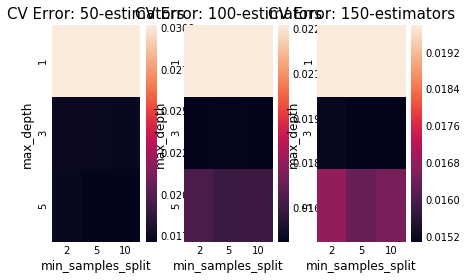

In [39]:
max_depth = [1, 3, 5]
min_samples_split = [2, 5, 10]
n_estimators = [50, 100, 150]
cv_score = np.zeros([len(max_depth), len(min_samples_split), len(n_estimators)])
for di, d in enumerate(max_depth):
    for si, s in enumerate(min_samples_split):
        for ei, e in enumerate(n_estimators):
            dtr = GradientBoostingRegressor(max_depth=d, min_samples_split=s, n_estimators=e, random_state=8848)
            scores = cross_val_score(dtr, X_train, y_train, cv=NFOLDS, scoring='neg_mean_squared_error')
            cv_score[di, si, ei] = -scores.mean()

for ei, e in enumerate(n_estimators):
    plt.subplot(1, 3, ei+1)
    plt.title('CV Error: {}-estimators'.format(e), fontsize=15)
    sns.heatmap(cv_score[:, :, ei], xticklabels=min_samples_split, yticklabels=max_depth)
    plt.xlabel('min_samples_split')
    plt.ylabel('max_depth')

In [40]:
best_d, best_s, best_e = np.unravel_index(cv_score.argmin(), cv_score.shape)
print('The best parameters tuned by cross validation:')
print('  {name}: {value}'.format(name='max_depth', value=max_depth[best_d]))
print('  {name}: {value}'.format(name='min_samples_split', value=min_samples_split[best_s]))
print('  {name}: {value}'.format(name='n_estimators', value=n_estimators[best_e]))
print('The best cross validation error is {:.4f}'.format(cv_score.min()))

The best parameters tuned by cross validation:
  max_depth: 3
  min_samples_split: 10
  n_estimators: 150
The best cross validation error is 0.0151


In [41]:
best_ensembles.append(
    GradientBoostingRegressor(
        max_depth=max_depth[best_d], 
        min_samples_split=min_samples_split[best_s], 
        n_estimators=n_estimators[best_e], 
        random_state=8848)
)

### 2. BaggingRegressor(LinearRegression)

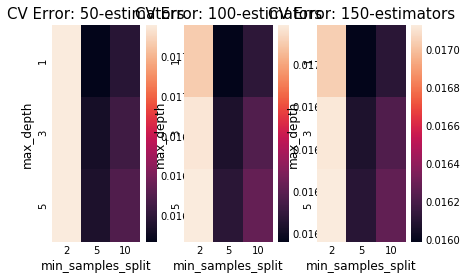

In [42]:
max_samples = [0.5, 0.8, 1.0]
max_features = [0.5, 0.8, 1.0]
n_estimators = [50, 100, 150]
cv_score = np.zeros([len(max_samples), len(max_features), len(n_estimators)])
for di, d in enumerate(max_samples):
    for si, s in enumerate(max_features):
        for ei, e in enumerate(n_estimators):
            dtr = BaggingRegressor(
                base_estimator=LinearRegression(),
                max_samples=d, 
                max_features=s, 
                n_estimators=e, 
                random_state=8848
            )
            scores = cross_val_score(dtr, X_train, y_train, cv=NFOLDS, scoring='neg_mean_squared_error')
            cv_score[di, si, ei] = -scores.mean()

for ei, e in enumerate(n_estimators):
    plt.subplot(1, 3, ei+1)
    plt.title('CV Error: {}-estimators'.format(e), fontsize=15)
    sns.heatmap(cv_score[:, :, ei], xticklabels=min_samples_split, yticklabels=max_depth)
    plt.xlabel('min_samples_split')
    plt.ylabel('max_depth')

In [43]:
best_d, best_s, best_e = np.unravel_index(cv_score.argmin(), cv_score.shape)
print('The best parameters tuned by cross validation:')
print('  {name}: {value}'.format(name='max_samples', value=max_samples[best_d]))
print('  {name}: {value}'.format(name='max_features', value=max_features[best_s]))
print('  {name}: {value}'.format(name='n_estimators', value=n_estimators[best_e]))
print('The best cross validation error is {:.4f}'.format(cv_score.min()))

The best parameters tuned by cross validation:
  max_samples: 0.5
  max_features: 0.8
  n_estimators: 100
The best cross validation error is 0.0160


In [44]:
best_ensembles.append(
    BaggingRegressor(
        base_estimator=LinearRegression(),
        max_samples=max_samples[best_d], 
        max_features=max_features[best_s], 
        n_estimators=n_estimators[best_e], 
        random_state=8848
    )
)

### 3. BaggingRegressor(LinearSVR)

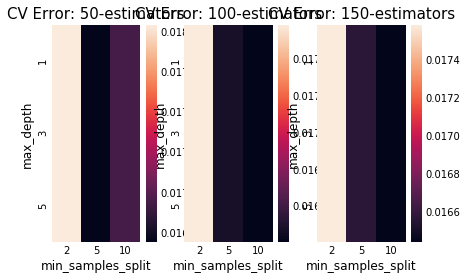

In [46]:
max_samples = [0.5, 0.8, 1.0]
max_features = [0.5, 0.8, 1.0]
n_estimators = [50, 100, 150]
cv_score = np.zeros([len(max_samples), len(max_features), len(n_estimators)])
for di, d in enumerate(max_samples):
    for si, s in enumerate(max_features):
        for ei, e in enumerate(n_estimators):
            dtr = BaggingRegressor(
                base_estimator=LinearSVR(C=0.522),
                max_samples=d, 
                max_features=s, 
                n_estimators=e, 
                random_state=8848
            )
            scores = cross_val_score(dtr, X_train, y_train, cv=NFOLDS, scoring='neg_mean_squared_error')
            cv_score[di, si, ei] = -scores.mean()

for ei, e in enumerate(n_estimators):
    plt.subplot(1, 3, ei+1)
    plt.title('CV Error: {}-estimators'.format(e), fontsize=15)
    sns.heatmap(cv_score[:, :, ei], xticklabels=min_samples_split, yticklabels=max_depth)
    plt.xlabel('min_samples_split')
    plt.ylabel('max_depth')

In [47]:
best_d, best_s, best_e = np.unravel_index(cv_score.argmin(), cv_score.shape)
print('The best parameters tuned by cross validation:')
print('  {name}: {value}'.format(name='max_samples', value=max_samples[best_d]))
print('  {name}: {value}'.format(name='max_features', value=max_features[best_s]))
print('  {name}: {value}'.format(name='n_estimators', value=n_estimators[best_e]))
print('The best cross validation error is {:.4f}'.format(cv_score.min()))

The best parameters tuned by cross validation:
  max_samples: 0.5
  max_features: 1.0
  n_estimators: 150
The best cross validation error is 0.0164


In [48]:
best_ensembles.append(
    BaggingRegressor(
        base_estimator=LinearSVR(C=0.1),
        max_samples=max_samples[best_d], 
        max_features=max_features[best_s], 
        n_estimators=n_estimators[best_e], 
        random_state=8848
    )
)

### Summary

In [49]:
np.random.seed(8848)
table = {name(m): -cross_val_score(m, X_train, y_train, cv=NFOLDS, scoring='neg_mean_squared_error').mean() 
                     for m in best_ensembles}

pd.Series(table).sort_values(ascending=True)

GradientBoostingRegressor             0.015077
BaggingRegressor(LinearRegression)    0.015950
BaggingRegressor(LinearSVR)           0.016282
dtype: float64

# d. Stacking

In [50]:
def get_oof(clf, x_train, y_train, x_test):
    oof_train = np.zeros((ntrain,))
    oof_test = np.zeros((ntest,))
    oof_test_skf = np.empty((NFOLDS, ntest))

    for i, (train_index, test_index) in enumerate(kf.split(x_train)):
        x_tr = x_train[train_index]
        y_tr = y_train[train_index]
        x_te = x_train[test_index]

        clf.fit(x_tr, y_tr)

        oof_train[test_index] = clf.predict(x_te)
        oof_test_skf[i, :] = clf.predict(x_test)

    oof_test[:] = oof_test_skf.mean(axis=0)
    return oof_train.reshape(-1, 1), oof_test.reshape(-1, 1)

In [70]:
best_ensembles = []
best_ensembles.append(
    GradientBoostingRegressor(
        max_depth=3, 
        min_samples_split=10, 
        n_estimators=150, 
        random_state=8848)
)
best_ensembles.append(
    BaggingRegressor(
        base_estimator=LinearRegression(),
        max_samples=0.5, 
        max_features=0.8, 
        n_estimators=100, 
        random_state=8848
    )
)
best_ensembles.append(
    BaggingRegressor(
        base_estimator=LinearSVR(C=0.1),
        max_samples=0.5, 
        max_features=1, 
        n_estimators=150, 
        random_state=8848
    )
)

In [71]:
from sklearn.model_selection import KFold
ntrain = X_train.shape[0]
ntest = X_test.shape[0]
SEED = 0 # for reproducibility
NFOLDS = 5 # set folds for out-of-fold prediction
kf = KFold(n_splits= NFOLDS, random_state=SEED)

meta_inputs = [get_oof(m, X_train, y_train, X_test) for m in best_ensembles]
meta_train = np.concatenate([m[0] for m in meta_inputs], axis=1)
meta_test = np.concatenate([m[1] for m in meta_inputs], axis=1)

In [72]:
-cross_val_score(XGBRegressor(), meta_train, y_train, cv=NFOLDS, scoring='neg_mean_squared_error').mean()

0.014323755443403353

### Tune parameter of XGBoost

Text(17.06,0.5,'max_depth')

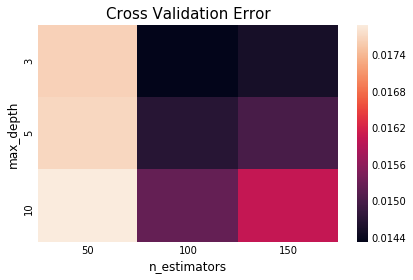

In [73]:
max_depth = [3, 5, 10]
n_estimators = [50, 100, 150]
cv_score = np.zeros([len(max_depth), len(n_estimators)])
for di, d in enumerate(max_depth):
    for si, s in enumerate(n_estimators):
        dtr = XGBRegressor(max_depth=d, n_estimators=s, random_state=8848)
        scores = cross_val_score(dtr, meta_train, y_train, cv=NFOLDS, scoring='neg_mean_squared_error')
        cv_score[di, si] = -scores.mean()

plt.title('Cross Validation Error', fontsize=15)
sns.heatmap(cv_score, xticklabels=n_estimators, yticklabels=max_depth)
plt.xlabel('n_estimators')
plt.ylabel('max_depth')

In [74]:
best_d, best_s = np.unravel_index(cv_score.argmin(), cv_score.shape)
print('The best parameters tuned by cross validation:')
print('  {name}: {value}'.format(name='max_depth', value=max_depth[best_d]))
print('  {name}: {value}'.format(name='n_estimators', value=n_estimators[best_s]))
print('The best cross validation error is {:.4f}'.format(cv_score.min()))

The best parameters tuned by cross validation:
  max_depth: 3
  n_estimators: 100
The best cross validation error is 0.0143


## Final Results

In [75]:
final_model = best_ensembles + [XGBRegressor(max_depth=max_depth[best_d], n_estimators=n_estimators[best_s], random_state=8848)]

In [76]:
table = {name(m): predict_and_score(m, inputs) for m in final_model}

In [77]:
series_best_first(table)

GradientBoostingRegressor             0.005490
XGBRegressor                          0.007605
BaggingRegressor(LinearRegression)    0.014463
BaggingRegressor(LinearSVR)           0.100654
dtype: float64

In [78]:
for m in final_model:
    write_submission(np.expm1(table[name(m)][0]), name(m)+'_submission.csv')